In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [282]:
url = '/Users/Jaimecalderon/Downloads/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)

In [283]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [296]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [327]:
total_por_categoria = df.groupby('category')['isBestSeller'].count()

# Calcular el número de best-sellers por categoría
best_sellers_por_categoria = df[df['isBestSeller'] == 1].groupby('category')['isBestSeller'].count()

# Calcular la proporción de best-sellers por categoría
proporciones = best_sellers_por_categoria / total_por_categoria

# Ordenar las categorías basadas en la proporción en orden descendente
categorias_ordenadas = proporciones.sort_values(ascending=False)

categorias_ordenadas

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Snowboard Boots                        NaN
Toy Advent Calendars                   NaN
USB Gadgets                            NaN
Vases                                  NaN
eBook Readers & Accessories            NaN
Name: isBestSeller, Length: 296, dtype: float64

In [ ]:
#The category where a best seller is more prevalent is Grocery with a proportion of 0.058135, followed by Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accessories ...

In [328]:
# Calcular el número total de productos por categoría
total_por_categoria = df.groupby('category')['isBestSeller'].count()

# Calcular el número de best-sellers por categoría
best_sellers_por_categoria = df[df['isBestSeller'] == 1].groupby('category')['isBestSeller'].count()

# Calcular la proporción de best-sellers por categoría
proporciones = best_sellers_por_categoria / total_por_categoria

# Ordenar las categorías basadas en la proporción en orden descendente
categorias_ordenadas = proporciones.sort_values(ascending=False)

# Mostrar las proporciones de best-sellers por categoría ordenadas
print("Proporciones de best-sellers por categoría ordenadas de mayor a menor:")
print(categorias_ordenadas)

# Identificar categorías donde ser best-seller es más prevalente
categoria_con_mayor_prevalencia = categorias_ordenadas.idxmax()
proporcion_mayor_prevalencia = categorias_ordenadas.max()

print(f"\nLa categoría donde ser un best-seller es más prevalente es '{categoria_con_mayor_prevalencia}'"
      f" con una proporción de {proporcion_mayor_prevalencia:.2f}.")

Proporciones de best-sellers por categoría ordenadas de mayor a menor:
category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Snowboard Boots                        NaN
Toy Advent Calendars                   NaN
USB Gadgets                            NaN
Vases                                  NaN
eBook Readers & Accessories            NaN
Name: isBestSeller, Length: 296, dtype: float64

La categoría donde ser un best-seller es más prevalente es 'Grocery' con una proporción de 0.06.


Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [329]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [330]:
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

In [ ]:
#There is a strong relation between both variables, we can say they are fully dependant of eachother. 

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [377]:
df1 = crosstab_result.sort_values(by=True,ascending=False).head(5)

In [378]:
df2 = crosstab_result.sort_values(by=False,ascending=False).head(5)

<Axes: xlabel='category'>

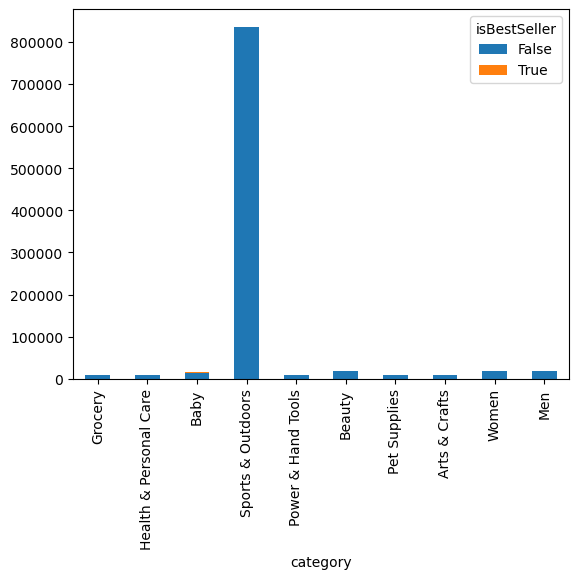

In [373]:
df1.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

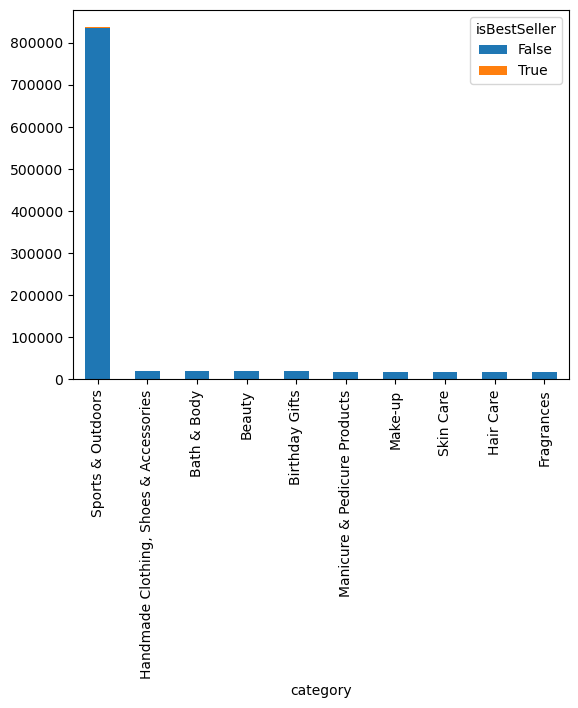

In [371]:
df2.plot(kind="bar", stacked=True)

<Axes: xlabel='category', ylabel='count'>

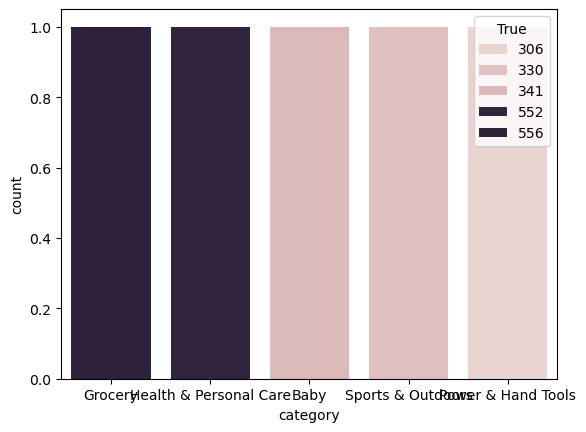

In [380]:
sns.countplot(data=df1, x='category', hue=True)

<Axes: xlabel='category', ylabel='count'>

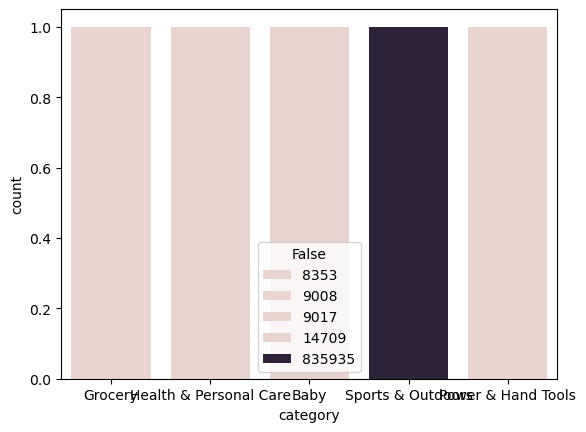

In [383]:
sns.countplot(data=df1, x='category', hue=False)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.




In [407]:
df_sin = df.drop(columns = 'isBestSeller')

In [427]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [432]:
def tukeys_test_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    
    return outliers


10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [426]:
tukeys_test_outliers(df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


In [418]:
df['price'].nunique()

82916

In [433]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers1 = tukeys_test_outliers(data_series)
outliers1

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [436]:
df_clean = df[~df['price'].isin(outliers1)]

In [437]:
df_clean

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [443]:
top20 = df_clean ['category'].value_counts().head(20).index.tolist ()

In [444]:
filter = df_clean[df_clean['category'].isin(top20)]

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_11512/1591618299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filter, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

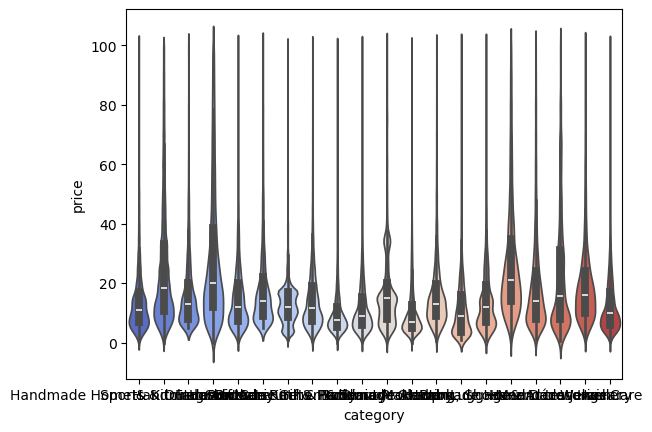

In [445]:
sns.violinplot(data=filter, x='category', y='price', palette="coolwarm")

In [446]:
top10 = df_clean ['category'].value_counts().head(10).index.tolist ()

In [448]:
filter10 = df_clean[df_clean['category'].isin(top10)]

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_11512/2351189623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter10, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

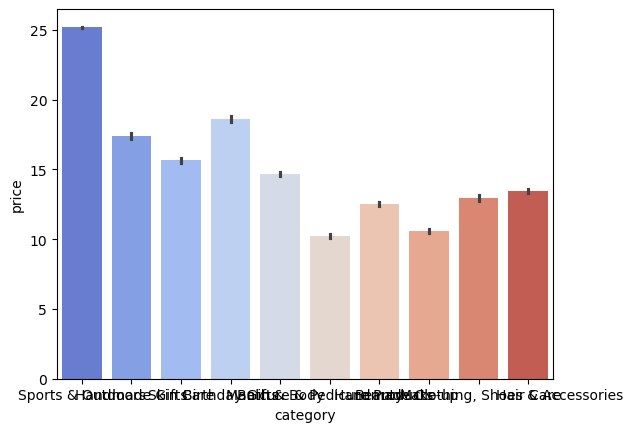

In [450]:
sns.barplot(data=filter10, x='category', y='price', palette="coolwarm")

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_11512/1523132366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filter10, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

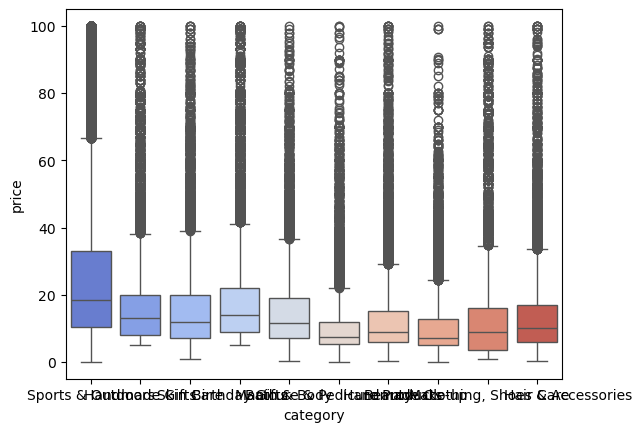

In [451]:
sns.boxplot(data=filter10, x='category', y='price', palette="coolwarm")

In [452]:
import scipy.stats as stats

In [454]:
correlation = df_clean['price'].corr(df['stars'])
correlation

-0.07767299878181352

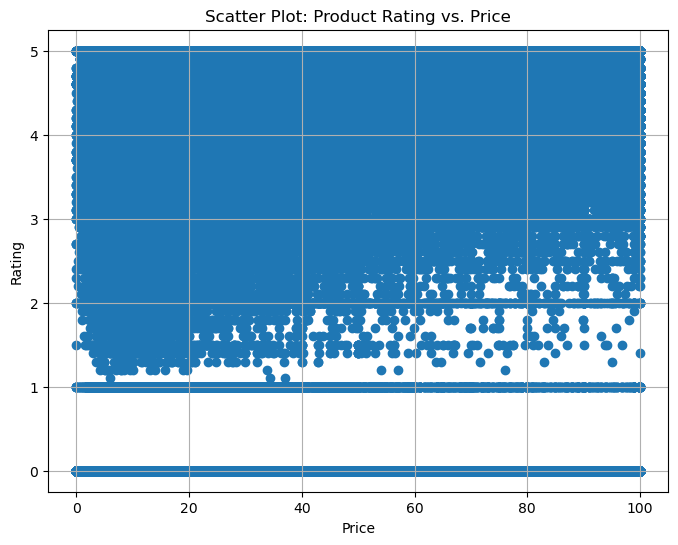

In [457]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean ['price'], df_clean['stars'])
plt.title('Scatter Plot: Product Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [458]:
numeric = df_clean.select_dtypes(include=[np.number])

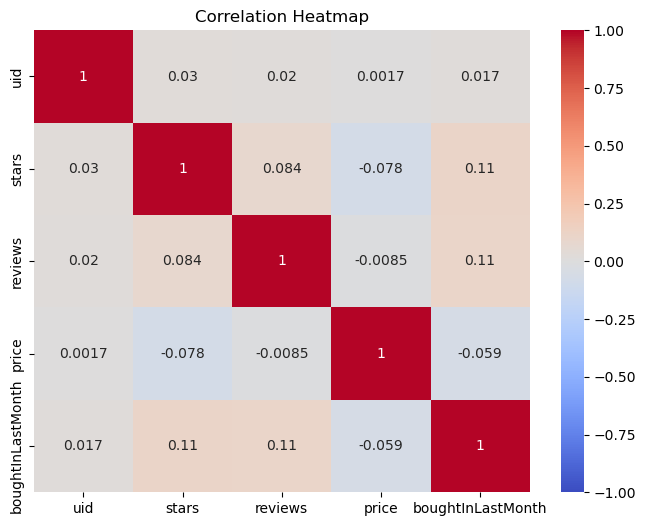

In [459]:
plt.figure(figsize = (8,6))
sns.heatmap(numeric.corr(), annot =True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

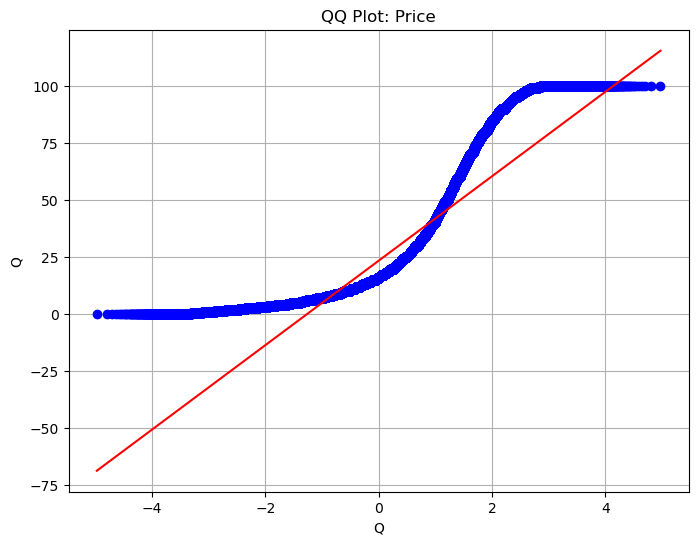

In [460]:
plt.figure(figsize=(8, 6))
stats.probplot(df_clean ['price'], dist = 'norm', plot =plt)
plt.title('QQ Plot: Price')
plt.xlabel('Q')
plt.ylabel('Q')
plt.grid(True)
plt.show()